# **Homework 1**

Due by **Feburary 10, 2023**


**Question 1**: Please design a linear regression algorithm to obtain the optimal value of $w_0$ and $w_1$ for the given data in Data_HW1_1.csv by assuming the outputs and the data samples provided in the following satisfy $y=w_0+w_1\times x +\varepsilon$, where $\varepsilon$ is measurement noise. 

*   Please provide the code, optimal values of $w_0$, $w_1$, training error, and testing error.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import the nessecary Python libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 

# Obtain your data samples
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Homework1_CNIT483/Data_HW1_1.csv') # you may need to change the path
x_data = data['x'].values
y_data = data['y'].values

# Generate training data (70% of the given data samples) and the testing data (30% of the given data samples). You can change to other percentage value as long as test_size <=0.3.
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3) 

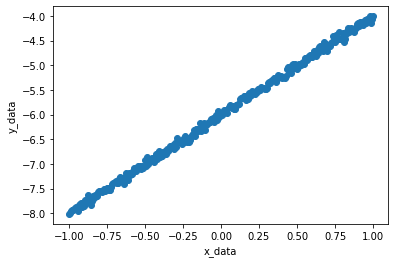

In [3]:
# creating scatter plot
plt.scatter(x_data, y_data) 
plt.xlabel("x_data")
plt.ylabel("y_data") 
plt.show()

In [4]:
# initializing Gradient-descent model
# Ref: 1) tf.keras.layers.Normalization: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Normalization; and 2) tf.keras.layers.Dense: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
model = models.Sequential()
model.add(layers.Normalization(input_shape=(1,), axis=None))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 1)                3         
 n)                                                              
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [5]:
# Utilize gradient-descent algorithm to create the learning model
adam = optimizers.Adam(learning_rate=0.5)
model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])

history = model.fit(x_train, y_train, epochs=2000, 
                    validation_data=(x_test, y_test))

Epoch 1/2000
7/7 [==============================] - 1s 46ms/step - loss: 6.0433 - mean_absolute_error: 6.0433 - val_loss: 5.8917 - val_mean_absolute_error: 5.8917
Epoch 2/2000
7/7 [==============================] - 0s 8ms/step - loss: 6.0362 - mean_absolute_error: 6.0362 - val_loss: 5.8848 - val_mean_absolute_error: 5.8848
Epoch 3/2000
7/7 [==============================] - 0s 8ms/step - loss: 6.0292 - mean_absolute_error: 6.0292 - val_loss: 5.8779 - val_mean_absolute_error: 5.8779
Epoch 4/2000
7/7 [==============================] - 0s 8ms/step - loss: 6.0223 - mean_absolute_error: 6.0223 - val_loss: 5.8710 - val_mean_absolute_error: 5.8710
Epoch 5/2000
7/7 [==============================] - 0s 8ms/step - loss: 6.0151 - mean_absolute_error: 6.0151 - val_loss: 5.8641 - val_mean_absolute_error: 5.8641
Epoch 6/2000
7/7 [==============================] - 0s 11ms/step - loss: 6.0081 - mean_absolute_error: 6.0081 - val_loss: 5.8571 - val_mean_absolute_error: 5.8571
Epoch 7/2000
7/7 [========

In [6]:
# Output weight and bias
W = model.layers[1].get_weights()
print(W)

[array([[1.989381]], dtype=float32), array([-6.001239], dtype=float32)]


3/3 - 0s - loss: 0.0380 - mean_absolute_error: 0.0380 - 23ms/epoch - 8ms/step
0.03803267329931259


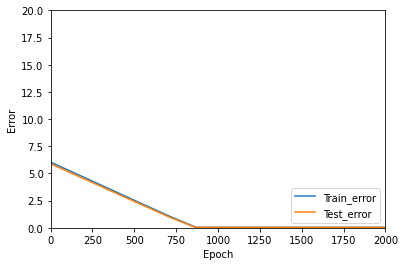

In [7]:
# Data visualization and performance evaluation
plt.plot(history.history['mean_absolute_error'], label='Train_error')
plt.plot(history.history['val_mean_absolute_error'], label = 'Test_error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.xlim([0, 2000])
plt.ylim([0, 20])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

**Question 2**: Please design a linear regression algorithm to obtain the optimal value of $w_0$, $w_1$, $w_2$, and $w_3$ for the given data in Data_HW1_2.csv by assuming the outputs and the data samples provided in the following satisfy $y=w_0+w_1\times x +w_2\times x^2+w_3\times x^3+\varepsilon$, where $\varepsilon$ is measurement noise. 

*   Please provide the code, optimal values of $w_0$, $w_1$, $w_2$, $w_3$, training error, and testing error.

In [8]:
# Obtain data samples
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Homework1_CNIT483/Data_HW1_2.csv') # you may need to change the path
x_1 = data['x'].values  # read x from the csv file
x_2 = np.power(x_1,2)  # define the square of x
x_3 = np.power(x_1, 3) 
x_data = np.stack((x_1, x_2, x_3), axis=1) # merge x and x square term into the new x_data
y_data = data['y'].values # read y from the csv file

# Generate training data (70% of the given data samples) and the testing data (30% of the given data samples). You can change to other percentage value as long as test_size <=0.3.
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

In [9]:
# initializing Gradient-descent model
# Ref: 1) tf.keras.layers.Normalization: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Normalization; and 2) tf.keras.layers.Dense: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
model = models.Sequential()
model.add(layers.Normalization(input_shape=(3,), axis=None))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 3)                3         
 ion)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 7
Trainable params: 4
Non-trainable params: 3
_________________________________________________________________


In [10]:
# Build learning model by using gradient-descent method
adam = optimizers.Adam(learning_rate=0.5)
model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])

history = model.fit(x_train, y_train, epochs=3500, 
                    validation_data=(x_test, y_test))

Streaming output truncated to the last 5000 lines.
7/7 [==============================] - 0s 11ms/step - loss: 14.5430 - mean_absolute_error: 14.5430 - val_loss: 14.6595 - val_mean_absolute_error: 14.6595
Epoch 1002/3500
7/7 [==============================] - 0s 10ms/step - loss: 14.4455 - mean_absolute_error: 14.4455 - val_loss: 14.5717 - val_mean_absolute_error: 14.5717
Epoch 1003/3500
7/7 [==============================] - 0s 11ms/step - loss: 14.3495 - mean_absolute_error: 14.3495 - val_loss: 14.4895 - val_mean_absolute_error: 14.4895
Epoch 1004/3500
7/7 [==============================] - 0s 10ms/step - loss: 14.2555 - mean_absolute_error: 14.2555 - val_loss: 14.4102 - val_mean_absolute_error: 14.4102
Epoch 1005/3500
7/7 [==============================] - 0s 11ms/step - loss: 14.1669 - mean_absolute_error: 14.1669 - val_loss: 14.3310 - val_mean_absolute_error: 14.3310
Epoch 1006/3500
7/7 [==============================] - 0s 8ms/step - loss: 14.0772 - mean_absolute_error: 14.0772 -

In [11]:
# Output weights and bias
W = model.layers[1].get_weights()
print(W)

[array([[2.0168836],
       [4.992109 ],
       [8.000968 ]], dtype=float32), array([-2.9823346], dtype=float32)]


3/3 - 0s - loss: 0.0131 - mean_absolute_error: 0.0131 - 25ms/epoch - 8ms/step
0.013129941187798977


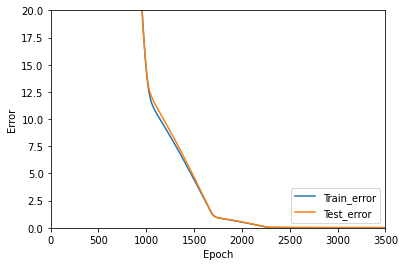

In [12]:
# Visualize performance evaluation
plt.plot(history.history['mean_absolute_error'], label='Train_error')
plt.plot(history.history['val_mean_absolute_error'], label = 'Test_error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.xlim([0, 3500])
plt.ylim([0, 20])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_acc)